In [1]:
import numpy as np
from scipy.interpolate import interpn
import tifffile
from math import log10, sqrt 

from utils.DataManager import DataManager

In [2]:
data_directory = "E:/TFG/core_dataset_sat"
lr_dataset_name = "lr_dataset"
hr_dataset_name = "hr_dataset/12bit"
datamanager = DataManager(data_directory, lr_dataset_name, hr_dataset_name)

hr_data, lr_data = datamanager.get_random_data()

(<Figure size 988.8x604.8 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x20f38d92e50>)

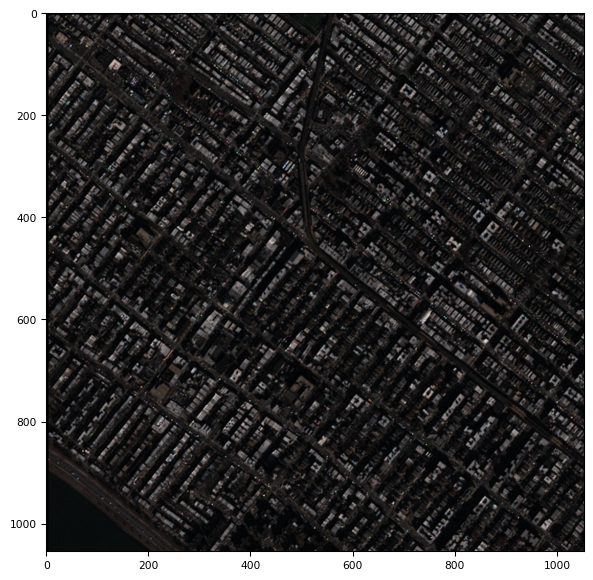

In [3]:
tifffile.imshow(hr_data[0].numpy())

(<Figure size 988.8x604.8 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x20f38fd8fd0>)

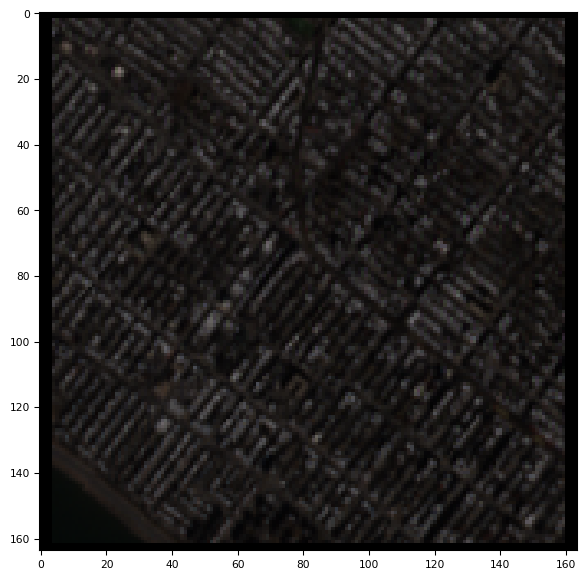

In [4]:
tifffile.imshow(lr_data[0].numpy())

In [5]:
def bicubic_interpolation(image, objective_dim): # De momento lo implementare para 1 sola foto a la vez
    #Calculo nuevas dimensiones
    height, width = image.shape[0] , image.shape[1]
    new_width, new_height = objective_dim[0], objective_dim[1]
    new_image = np.zeros((new_height, new_width, image.shape[2]))
    
     # Generar cuadrículas para las coordenadas X e Y de la imagen original y la interpolada
    x = np.linspace(0, width - 1, width)
    y = np.linspace(0, height - 1, height)
    new_x = np.linspace(0, width - 1, new_width)
    new_y = np.linspace(0, height - 1, new_height)
    print("Interpolating....")
    new_image = interpn((y, x), image, (new_y[:,None], new_x), method='cubic', bounds_error=False, fill_value=0)
    print("--------------------")
    return new_image

In [6]:
interpolated = bicubic_interpolation(lr_data[0].numpy() , (1054, 1054))

Interpolating....
--------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Figure size 988.8x604.8 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x20f3a1c8fd0>)

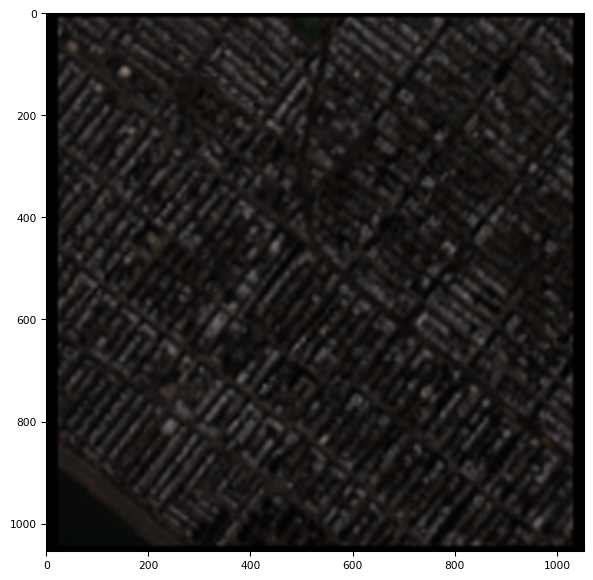

In [7]:
tifffile.imshow(interpolated)

In [8]:
def PSNR(Hr, upscaled): 
    mse = np.mean((Hr - upscaled) ** 2) 
    if mse == 0:  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 

In [9]:
hr_data, lr_data = datamanager.get_random_data(n_samples=20)

psnr = PSNR(hr_data[0].numpy(), interpolated)
print("PSNR: ", psnr)

PSNR:  68.66968857853821


In [10]:
psnrs = []
for i in range(20):
    psnr = PSNR(hr_data[i].numpy(), bicubic_interpolation(lr_data[i].numpy() , (1054, 1054)))
    print("PSNR: ", psnr)
    psnrs.append(psnr)
print("PSNR mean: ", np.mean(psnrs))

Interpolating....
--------------------
PSNR:  72.36896232054431
Interpolating....
--------------------
PSNR:  77.7629014665662
Interpolating....
--------------------
PSNR:  75.27570541821147
Interpolating....
--------------------
PSNR:  69.79207850709648
Interpolating....
--------------------
PSNR:  81.55759524601197
Interpolating....
--------------------
PSNR:  72.09497065950333
Interpolating....
--------------------
PSNR:  72.18538334081381
Interpolating....
--------------------
PSNR:  66.89392826923117
Interpolating....
--------------------
PSNR:  68.84164099495497
Interpolating....
--------------------
PSNR:  75.92468059184992
Interpolating....
--------------------
PSNR:  78.49907492529094
Interpolating....
--------------------
PSNR:  71.16967524222414
Interpolating....
--------------------
PSNR:  63.18550459480235
Interpolating....
--------------------
PSNR:  74.84271878789437
Interpolating....
--------------------
PSNR:  72.7584183616806
Interpolating....
--------------------
PSN